# Melbourne Housing Prices Dataset

In this notebook, I obtained a dataset of Melbourne Housing Prices from Kaggle which was orginally pulled from property advertisements on Domain.com.au between 2016 and 2017.

Using this dataset, I will be import, prepare, complete in-depth analysis and visualise key insights obtained from this dataset.

# Import Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('seaborn')

# Import CSV File

In [2]:
melbourne_housing_df = pd.read_csv('Melbourne_Housing_Data.csv')
melbourne_housing_df.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,1480000,S,Biggin,03/12/2016,2.5,3067,...,1,1.0,202,NaN,NaN,Yarra,-37.7996,144.9984,Northern Metropolitan,4019
1,Abbotsford,25 Bloomburg St,2,h,1035000,S,Biggin,04/02/2016,2.5,3067,...,1,0.0,156,79.0,1900.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019
2,Abbotsford,5 Charles St,3,h,1465000,SP,Biggin,04/03/2017,2.5,3067,...,2,0.0,134,150.0,1900.0,Yarra,-37.8093,144.9944,Northern Metropolitan,4019
3,Abbotsford,40 Federation La,3,h,850000,PI,Biggin,04/03/2017,2.5,3067,...,2,1.0,94,NaN,NaN,Yarra,-37.7969,144.9969,Northern Metropolitan,4019
4,Abbotsford,55a Park St,4,h,1600000,VB,Nelson,04/06/2016,2.5,3067,...,1,2.0,120,142.0,2014.0,Yarra,-37.8072,144.9941,Northern Metropolitan,4019


# Quick Analysis to get an understanding of the DataFrame before Data Prepartion

The .info() function was used to get an overview of the datatype of the values in each column of melbourne_housing_df

In [3]:
melbourne_housing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13580 entries, 0 to 13579
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         13580 non-null  object 
 1   Address        13580 non-null  object 
 2   Rooms          13580 non-null  int64  
 3   Type           13580 non-null  object 
 4   Price          13580 non-null  int64  
 5   Method         13580 non-null  object 
 6   SellerG        13580 non-null  object 
 7   Date           13580 non-null  object 
 8   Distance       13580 non-null  float64
 9   Postcode       13580 non-null  int64  
 10  Bedroom2       13580 non-null  int64  
 11  Bathroom       13580 non-null  int64  
 12  Car            13518 non-null  float64
 13  Landsize       13580 non-null  int64  
 14  BuildingArea   7130 non-null   float64
 15  YearBuilt      8205 non-null   float64
 16  CouncilArea    12211 non-null  object 
 17  Lattitude      13580 non-null  float64
 18  Longti

.shape function was used to display number of rows and columns in melbourne_housing_df.

In [4]:
melbourne_housing_df.shape

(13580, 21)

.columns function displays all the column names of melbourne_housing_df.

In [5]:
print(melbourne_housing_df.columns)

Index(['Suburb', 'Address', 'Rooms', 'Type', 'Price', 'Method', 'SellerG',
       'Date', 'Distance', 'Postcode', 'Bedroom2', 'Bathroom', 'Car',
       'Landsize', 'BuildingArea', 'YearBuilt', 'CouncilArea', 'Lattitude',
       'Longtitude', 'Regionname', 'Propertycount'],
      dtype='object')


.values function displays the values of melbourne_housing_df.

In [6]:
print(melbourne_housing_df.values)

[['Abbotsford' '85 Turner St' 2 ... 144.9984 'Northern Metropolitan' 4019]
 ['Abbotsford' '25 Bloomburg St' 2 ... 144.9934 'Northern Metropolitan'
  4019]
 ['Abbotsford' '5 Charles St' 3 ... 144.9944 'Northern Metropolitan' 4019]
 ...
 ['Williamstown' '83 Power St' 3 ... 144.88738 'Western Metropolitan'
  6380]
 ['Williamstown' '96 Verdon St' 4 ... 144.89299 'Western Metropolitan'
  6380]
 ['Yarraville' '6 Agnes St' 4 ... 144.88449 'Western Metropolitan' 6543]]


# Preparation of Data

Indexing - I set an index on Regionname column as it may be useful later to merge on this index. Also, it gives a clear overview at the beginning of each row which region is associated with it.

In [7]:
melbourne_housing_dataframe = melbourne_housing_df.set_index('Regionname')
melbourne_housing_dataframe 

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Propertycount
Regionname,,,,,,,,,,,,,,,,,,,,
Northern Metropolitan,Abbotsford,85 Turner St,2,h,1480000,S,Biggin,03/12/2016,2.5,3067,2,1,1.0,202,NaN,NaN,Yarra,-37.79960,144.99840,4019
Northern Metropolitan,Abbotsford,25 Bloomburg St,2,h,1035000,S,Biggin,04/02/2016,2.5,3067,2,1,0.0,156,79.0,1900.0,Yarra,-37.80790,144.99340,4019
Northern Metropolitan,Abbotsford,5 Charles St,3,h,1465000,SP,Biggin,04/03/2017,2.5,3067,3,2,0.0,134,150.0,1900.0,Yarra,-37.80930,144.99440,4019
Northern Metropolitan,Abbotsford,40 Federation La,3,h,850000,PI,Biggin,04/03/2017,2.5,3067,3,2,1.0,94,NaN,NaN,Yarra,-37.79690,144.99690,4019
Northern Metropolitan,Abbotsford,55a Park St,4,h,1600000,VB,Nelson,04/06/2016,2.5,3067,3,1,2.0,120,142.0,2014.0,Yarra,-37.80720,144.99410,4019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
South-Eastern Metropolitan,Wheelers Hill,12 Strada Cr,4,h,1245000,S,Barry,26/08/2017,16.7,3150,4,2,2.0,652,NaN,1981.0,NaN,-37.90562,145.16761,7392
Western Metropolitan,Williamstown,77 Merrett Dr,3,h,1031000,SP,Williams,26/08/2017,6.8,3016,3,2,2.0,333,133.0,1995.0,NaN,-37.85927,144.87904,6380
Western Metropolitan,Williamstown,83 Power St,3,h,1170000,S,Raine,26/08/2017,6.8,3016,3,2,4.0,436,NaN,1997.0,NaN,-37.85274,144.88738,6380


Checking for Missing Values

In [8]:
print(melbourne_housing_dataframe .isnull())

                            Suburb  Address  Rooms   Type  Price  Method  \
Regionname                                                                 
Northern Metropolitan        False    False  False  False  False   False   
Northern Metropolitan        False    False  False  False  False   False   
Northern Metropolitan        False    False  False  False  False   False   
Northern Metropolitan        False    False  False  False  False   False   
Northern Metropolitan        False    False  False  False  False   False   
...                            ...      ...    ...    ...    ...     ...   
South-Eastern Metropolitan   False    False  False  False  False   False   
Western Metropolitan         False    False  False  False  False   False   
Western Metropolitan         False    False  False  False  False   False   
Western Metropolitan         False    False  False  False  False   False   
Western Metropolitan         False    False  False  False  False   False   

           

Used isnull().sum() to get an overview of the volume of missing values and created a new DataFrame, melbourne_missing_data to create a bar chart.

In [9]:
melbourne_missing_data = melbourne_housing_dataframe.isnull().sum()
print(melbourne_missing_data) 

Suburb              0
Address             0
Rooms               0
Type                0
Price               0
Method              0
SellerG             0
Date                0
Distance            0
Postcode            0
Bedroom2            0
Bathroom            0
Car                62
Landsize            0
BuildingArea     6450
YearBuilt        5375
CouncilArea      1369
Lattitude           0
Longtitude          0
Propertycount       0
dtype: int64


<AxesSubplot:>

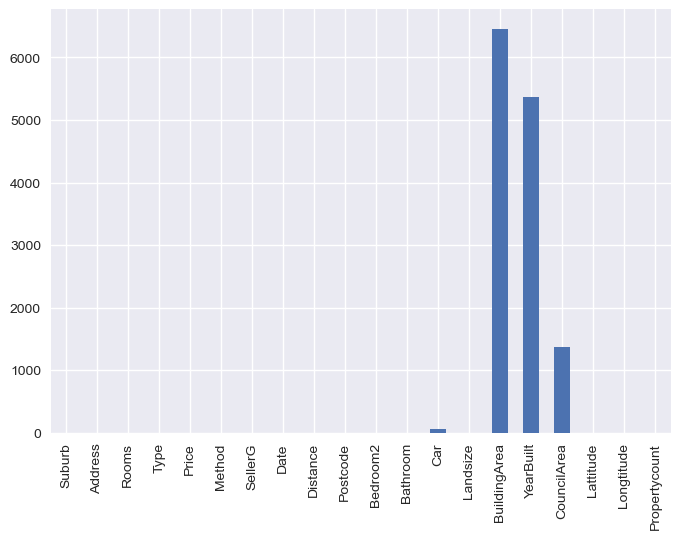

In [10]:
melbourne_missing_data.plot.bar()

Removing columns with a high number of missing values

In [11]:
melbourne_df = melbourne_housing_dataframe.drop(['BuildingArea', 'YearBuilt', 'CouncilArea'], axis=1)
melbourne_df.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,Lattitude,Longtitude,Propertycount
Regionname,,,,,,,,,,,,,,,,,
Northern Metropolitan,Abbotsford,85 Turner St,2,h,1480000,S,Biggin,03/12/2016,2.5,3067,2,1,1.0,202,-37.7996,144.9984,4019
Northern Metropolitan,Abbotsford,25 Bloomburg St,2,h,1035000,S,Biggin,04/02/2016,2.5,3067,2,1,0.0,156,-37.8079,144.9934,4019
Northern Metropolitan,Abbotsford,5 Charles St,3,h,1465000,SP,Biggin,04/03/2017,2.5,3067,3,2,0.0,134,-37.8093,144.9944,4019
Northern Metropolitan,Abbotsford,40 Federation La,3,h,850000,PI,Biggin,04/03/2017,2.5,3067,3,2,1.0,94,-37.7969,144.9969,4019
Northern Metropolitan,Abbotsford,55a Park St,4,h,1600000,VB,Nelson,04/06/2016,2.5,3067,3,1,2.0,120,-37.8072,144.9941,4019


.describe function was used to get the numercial statistics for the numercial columns. This was used to obtain the mean to fill the missing values of the 'Car' column.

In [12]:
melbourne_df.describe()

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,Lattitude,Longtitude,Propertycount
count,13580.000000,1.358000e+04,13580.000000,13580.000000,13580.000000,13580.000000,13518.000000,13580.000000,13580.000000,13580.000000,13580.000000
mean,2.937997,1.075684e+06,10.137776,3105.301915,2.914728,1.534242,1.610075,558.416127,-37.809203,144.995216,7454.417378
std,0.955748,6.393107e+05,5.868725,90.676964,0.965921,0.691712,0.962634,3990.669241,0.079260,0.103916,4378.581772
min,1.000000,8.500000e+04,0.000000,3000.000000,0.000000,0.000000,0.000000,0.000000,-38.182550,144.431810,249.000000
25%,2.000000,6.500000e+05,6.100000,3044.000000,2.000000,1.000000,1.000000,177.000000,-37.856822,144.929600,4380.000000
50%,3.000000,9.030000e+05,9.200000,3084.000000,3.000000,1.000000,2.000000,440.000000,-37.802355,145.000100,6555.000000
75%,3.000000,1.330000e+06,13.000000,3148.000000,3.000000,2.000000,2.000000,651.000000,-37.756400,145.058305,10331.000000
max,10.000000,9.000000e+06,48.100000,3977.000000,20.000000,8.000000,10.000000,433014.000000,-37.408530,145.526350,21650.000000


Fill in missing values of 'Car' column. 

In [13]:
melbourne_housing_df = melbourne_df.fillna(1.610075) 
melbourne_housing_df

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,Lattitude,Longtitude,Propertycount
Regionname,,,,,,,,,,,,,,,,,
Northern Metropolitan,Abbotsford,85 Turner St,2,h,1480000,S,Biggin,03/12/2016,2.5,3067,2,1,1.0,202,-37.79960,144.99840,4019
Northern Metropolitan,Abbotsford,25 Bloomburg St,2,h,1035000,S,Biggin,04/02/2016,2.5,3067,2,1,0.0,156,-37.80790,144.99340,4019
Northern Metropolitan,Abbotsford,5 Charles St,3,h,1465000,SP,Biggin,04/03/2017,2.5,3067,3,2,0.0,134,-37.80930,144.99440,4019
Northern Metropolitan,Abbotsford,40 Federation La,3,h,850000,PI,Biggin,04/03/2017,2.5,3067,3,2,1.0,94,-37.79690,144.99690,4019
Northern Metropolitan,Abbotsford,55a Park St,4,h,1600000,VB,Nelson,04/06/2016,2.5,3067,3,1,2.0,120,-37.80720,144.99410,4019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
South-Eastern Metropolitan,Wheelers Hill,12 Strada Cr,4,h,1245000,S,Barry,26/08/2017,16.7,3150,4,2,2.0,652,-37.90562,145.16761,7392
Western Metropolitan,Williamstown,77 Merrett Dr,3,h,1031000,SP,Williams,26/08/2017,6.8,3016,3,2,2.0,333,-37.85927,144.87904,6380
Western Metropolitan,Williamstown,83 Power St,3,h,1170000,S,Raine,26/08/2017,6.8,3016,3,2,4.0,436,-37.85274,144.88738,6380


Checking that all missing values have been removed or filled in.

In [14]:
melbourne_housing_df.isnull().sum()

Suburb           0
Address          0
Rooms            0
Type             0
Price            0
Method           0
SellerG          0
Date             0
Distance         0
Postcode         0
Bedroom2         0
Bathroom         0
Car              0
Landsize         0
Lattitude        0
Longtitude       0
Propertycount    0
dtype: int64

Checking for Duplicates

In [15]:
melbourne_housing_df.duplicated()

Regionname
Northern Metropolitan         False
Northern Metropolitan         False
Northern Metropolitan         False
Northern Metropolitan         False
Northern Metropolitan         False
                              ...  
South-Eastern Metropolitan    False
Western Metropolitan          False
Western Metropolitan          False
Western Metropolitan          False
Western Metropolitan          False
Length: 13580, dtype: bool

In [16]:
melbourne_housing_df.duplicated().sum()

0

There are no missing values, however including drop_duplicates function to display how it would be completed if there were missing values.

In [17]:
melbourne_housing_df.drop_duplicates()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,Lattitude,Longtitude,Propertycount
Regionname,,,,,,,,,,,,,,,,,
Northern Metropolitan,Abbotsford,85 Turner St,2,h,1480000,S,Biggin,03/12/2016,2.5,3067,2,1,1.0,202,-37.79960,144.99840,4019
Northern Metropolitan,Abbotsford,25 Bloomburg St,2,h,1035000,S,Biggin,04/02/2016,2.5,3067,2,1,0.0,156,-37.80790,144.99340,4019
Northern Metropolitan,Abbotsford,5 Charles St,3,h,1465000,SP,Biggin,04/03/2017,2.5,3067,3,2,0.0,134,-37.80930,144.99440,4019
Northern Metropolitan,Abbotsford,40 Federation La,3,h,850000,PI,Biggin,04/03/2017,2.5,3067,3,2,1.0,94,-37.79690,144.99690,4019
Northern Metropolitan,Abbotsford,55a Park St,4,h,1600000,VB,Nelson,04/06/2016,2.5,3067,3,1,2.0,120,-37.80720,144.99410,4019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
South-Eastern Metropolitan,Wheelers Hill,12 Strada Cr,4,h,1245000,S,Barry,26/08/2017,16.7,3150,4,2,2.0,652,-37.90562,145.16761,7392
Western Metropolitan,Williamstown,77 Merrett Dr,3,h,1031000,SP,Williams,26/08/2017,6.8,3016,3,2,2.0,333,-37.85927,144.87904,6380
Western Metropolitan,Williamstown,83 Power St,3,h,1170000,S,Raine,26/08/2017,6.8,3016,3,2,4.0,436,-37.85274,144.88738,6380


The values in the ‘Type’ column were in the form of initials, ‘h’, ‘t’ and ‘u’. To enable clearer understanding and reading visualizes later in the project, I replaced these values with ‘House’, ‘Townhouse’ and ‘Unit’ respectively using the .replace() function.

In [18]:
melbourne_property_df = melbourne_housing_df.replace({'h': 'House', 'u': 'Unit', 't': 'Townhouse'})
melbourne_property_df

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,Lattitude,Longtitude,Propertycount
Regionname,,,,,,,,,,,,,,,,,
Northern Metropolitan,Abbotsford,85 Turner St,2,House,1480000,S,Biggin,03/12/2016,2.5,3067,2,1,1.0,202,-37.79960,144.99840,4019
Northern Metropolitan,Abbotsford,25 Bloomburg St,2,House,1035000,S,Biggin,04/02/2016,2.5,3067,2,1,0.0,156,-37.80790,144.99340,4019
Northern Metropolitan,Abbotsford,5 Charles St,3,House,1465000,SP,Biggin,04/03/2017,2.5,3067,3,2,0.0,134,-37.80930,144.99440,4019
Northern Metropolitan,Abbotsford,40 Federation La,3,House,850000,PI,Biggin,04/03/2017,2.5,3067,3,2,1.0,94,-37.79690,144.99690,4019
Northern Metropolitan,Abbotsford,55a Park St,4,House,1600000,VB,Nelson,04/06/2016,2.5,3067,3,1,2.0,120,-37.80720,144.99410,4019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
South-Eastern Metropolitan,Wheelers Hill,12 Strada Cr,4,House,1245000,S,Barry,26/08/2017,16.7,3150,4,2,2.0,652,-37.90562,145.16761,7392
Western Metropolitan,Williamstown,77 Merrett Dr,3,House,1031000,SP,Williams,26/08/2017,6.8,3016,3,2,2.0,333,-37.85927,144.87904,6380
Western Metropolitan,Williamstown,83 Power St,3,House,1170000,S,Raine,26/08/2017,6.8,3016,3,2,4.0,436,-37.85274,144.88738,6380


# Sub-Setting of Dataframes
I have sorted and sliced melbourne_property_df dataframe into relevant themes to ensure optimum insights and assist with the merging of dataframes later in the project.

Large_landsize dataframe represents land size over 10,000 

In [19]:
Large_landsize = melbourne_property_df[(melbourne_property_df['Landsize'] >=10000)]
Large_landsize

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,Lattitude,Longtitude,Propertycount
Regionname,,,,,,,,,,,,,,,,,
Southern Metropolitan,Balwyn North,9 Gildan St,3,House,2000000,VB,Kay,28/08/2016,9.2,3104,3,1,2.0,75100,-37.80020,145.07000,7809
Northern Metropolitan,Collingwood,4/170 Oxford St,3,Unit,950000,S,Jellis,04/03/2017,1.6,3066,3,2,1.0,15900,-37.80350,144.98500,4553
Western Metropolitan,Essendon North,1 Dudley St,3,House,1425000,S,McGrath,25/02/2017,9.4,3041,3,2,2.0,10100,-37.73760,144.89540,1308
Western Metropolitan,Maidstone,17/46 Eucalyptus Dr,2,Unit,352500,S,hockingstuart,18/03/2017,9.2,3012,2,1,1.0,15100,-37.77950,144.87290,3873
Western Metropolitan,Maribyrnong,44/2 Horizon Dr,2,Unit,495000,S,Brad,18/03/2017,8.7,3032,2,2,2.0,37000,-37.77520,144.89250,4918
Southern Metropolitan,Port Melbourne,36/3 Seisman Pl,2,Unit,1340000,VB,Chisholm,03/12/2016,3.8,3207,2,2,2.0,21700,-37.84240,144.94490,8648
Northern Metropolitan,Reservoir,14 Beenak St,3,House,572000,S,Ray,23/04/2016,11.2,3073,3,1,2.0,41400,-37.71040,145.02570,21650
Southern Metropolitan,South Yarra,413/35 Malcolm St,1,Unit,315000,PI,hockingstuart,03/12/2016,3.3,3141,1,1,0.0,14500,-37.83720,144.99630,14887
Southern Metropolitan,South Yarra,503/99 River St,2,Unit,978500,S,hockingstuart,04/03/2017,3.3,3141,2,2,2.0,17200,-37.83610,144.99660,14887


relevant_columns_df is a simplified dataframe of columns which I would like to use later in this project. Slicing was completed using the iloc function for efficiency.

In [20]:
relevant_columns_df = melbourne_property_df.iloc[:, [0, 2, 3, 4, 7, 8, 10, 11, 12, 13, 14, 15]]
relevant_columns_df

,Suburb,Rooms,Type,Price,Date,Distance,Bedroom2,Bathroom,Car,Landsize,Lattitude,Longtitude
Regionname,,,,,,,,,,,,
Northern Metropolitan,Abbotsford,2,House,1480000,03/12/2016,2.5,2,1,1.0,202,-37.79960,144.99840
Northern Metropolitan,Abbotsford,2,House,1035000,04/02/2016,2.5,2,1,0.0,156,-37.80790,144.99340
Northern Metropolitan,Abbotsford,3,House,1465000,04/03/2017,2.5,3,2,0.0,134,-37.80930,144.99440
Northern Metropolitan,Abbotsford,3,House,850000,04/03/2017,2.5,3,2,1.0,94,-37.79690,144.99690
Northern Metropolitan,Abbotsford,4,House,1600000,04/06/2016,2.5,3,1,2.0,120,-37.80720,144.99410
...,...,...,...,...,...,...,...,...,...,...,...,...
South-Eastern Metropolitan,Wheelers Hill,4,House,1245000,26/08/2017,16.7,4,2,2.0,652,-37.90562,145.16761
Western Metropolitan,Williamstown,3,House,1031000,26/08/2017,6.8,3,2,2.0,333,-37.85927,144.87904
Western Metropolitan,Williamstown,3,House,1170000,26/08/2017,6.8,3,2,4.0,436,-37.85274,144.88738


property_type_df was created to focus on House and Townhouse property types.
I first made a list for Property Types and then used this along with the isin function to subset melbourne_property_df.

In [21]:
property_type = ["House", "Townhouse"]

In [22]:
property_type_df = melbourne_property_df[melbourne_property_df["Type"].isin(property_type)]
property_type_df

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,Lattitude,Longtitude,Propertycount
Regionname,,,,,,,,,,,,,,,,,
Northern Metropolitan,Abbotsford,85 Turner St,2,House,1480000,S,Biggin,03/12/2016,2.5,3067,2,1,1.0,202,-37.79960,144.99840,4019
Northern Metropolitan,Abbotsford,25 Bloomburg St,2,House,1035000,S,Biggin,04/02/2016,2.5,3067,2,1,0.0,156,-37.80790,144.99340,4019
Northern Metropolitan,Abbotsford,5 Charles St,3,House,1465000,SP,Biggin,04/03/2017,2.5,3067,3,2,0.0,134,-37.80930,144.99440,4019
Northern Metropolitan,Abbotsford,40 Federation La,3,House,850000,PI,Biggin,04/03/2017,2.5,3067,3,2,1.0,94,-37.79690,144.99690,4019
Northern Metropolitan,Abbotsford,55a Park St,4,House,1600000,VB,Nelson,04/06/2016,2.5,3067,3,1,2.0,120,-37.80720,144.99410,4019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
South-Eastern Metropolitan,Wheelers Hill,12 Strada Cr,4,House,1245000,S,Barry,26/08/2017,16.7,3150,4,2,2.0,652,-37.90562,145.16761,7392
Western Metropolitan,Williamstown,77 Merrett Dr,3,House,1031000,SP,Williams,26/08/2017,6.8,3016,3,2,2.0,333,-37.85927,144.87904,6380
Western Metropolitan,Williamstown,83 Power St,3,House,1170000,S,Raine,26/08/2017,6.8,3016,3,2,4.0,436,-37.85274,144.88738,6380


To get a table that consisted of mostly numercial data, I created another dataframe called property_type_df2 using iloc function.

In [23]:
property_type_df2 = property_type_df.iloc[:, [2, 3, 4, 7, 8, 10, 11, 12, 13, 14, 15]]
property_type_df2

,Rooms,Type,Price,Date,Distance,Bedroom2,Bathroom,Car,Landsize,Lattitude,Longtitude
Regionname,,,,,,,,,,,
Northern Metropolitan,2,House,1480000,03/12/2016,2.5,2,1,1.0,202,-37.79960,144.99840
Northern Metropolitan,2,House,1035000,04/02/2016,2.5,2,1,0.0,156,-37.80790,144.99340
Northern Metropolitan,3,House,1465000,04/03/2017,2.5,3,2,0.0,134,-37.80930,144.99440
Northern Metropolitan,3,House,850000,04/03/2017,2.5,3,2,1.0,94,-37.79690,144.99690
Northern Metropolitan,4,House,1600000,04/06/2016,2.5,3,1,2.0,120,-37.80720,144.99410
...,...,...,...,...,...,...,...,...,...,...,...
South-Eastern Metropolitan,4,House,1245000,26/08/2017,16.7,4,2,2.0,652,-37.90562,145.16761
Western Metropolitan,3,House,1031000,26/08/2017,6.8,3,2,2.0,333,-37.85927,144.87904
Western Metropolitan,3,House,1170000,26/08/2017,6.8,3,2,4.0,436,-37.85274,144.88738


Created a scatter plot to gain an understanding of the property type and price variations.

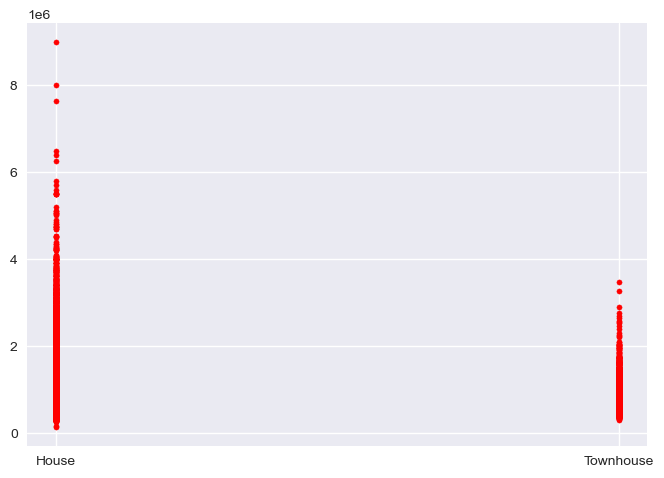

In [24]:
plt.scatter(property_type_df2['Type'],property_type_df2['Price'], color='r', s=14)

unit_df was created to focus speficially on Unit property types.
I first made a list for Property Type and then used this along with the isin function to subset melbourne_property_df.

In [25]:
property_type_unit = ["Unit"]
unit_df = melbourne_property_df[melbourne_property_df["Type"].isin(property_type_unit)]
unit_df

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,Lattitude,Longtitude,Propertycount
Regionname,,,,,,,,,,,,,,,,,
Northern Metropolitan,Abbotsford,6/241 Nicholson St,1,Unit,300000,S,Biggin,08/10/2016,2.5,3067,1,1,1.0,0,-37.80080,144.99730,4019
Northern Metropolitan,Abbotsford,411/8 Grosvenor St,2,Unit,700000,VB,Jellis,12/11/2016,2.5,3067,2,2,1.0,0,-37.81100,145.00670,4019
Northern Metropolitan,Abbotsford,123/56 Nicholson St,2,Unit,750000,S,Biggin,12/11/2016,2.5,3067,2,2,1.0,0,-37.80780,144.99650,4019
Northern Metropolitan,Abbotsford,7/20 Abbotsford St,1,Unit,441000,SP,Greg,14/05/2016,2.5,3067,1,1,1.0,0,-37.80160,144.99880,4019
Northern Metropolitan,Abbotsford,138/56 Nicholson St,3,Unit,1090000,S,Jellis,18/03/2017,2.5,3067,3,2,2.0,4290,-37.80780,144.99650,4019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Southern Metropolitan,Malvern East,2002 Malvern Rd,2,Unit,651000,SP,Jellis,26/08/2017,8.4,3145,2,1,1.0,129,-37.87798,145.06731,8801
Eastern Metropolitan,Mitcham,2/61 Orient Av,3,Unit,907800,S,Noel,26/08/2017,17.2,3132,3,2,2.0,309,-37.82653,145.20261,6871
Western Metropolitan,Moonee Ponds,1/53 Buckley St,2,Unit,435000,S,Nelson,26/08/2017,6.2,3039,2,1,1.0,1475,-37.75799,144.92354,6232


To understand the relationship of a specfic suburb, 'Rowville', I sliced / filtered melbourne_property_df with only data which 'Rowville' was contained in the rows. 

In [26]:
Rowville_overview = ["Rowville"]
Rowville_overview_df = melbourne_property_df[melbourne_property_df["Suburb"].isin(Rowville_overview)]
Rowville_overview_df

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,Lattitude,Longtitude,Propertycount
Regionname,,,,,,,,,,,,,,,,,
South-Eastern Metropolitan,Rowville,11 Jindalee Cl,5,House,870000,S,Harcourts,01/07/2017,23.5,3178,5,2,2.0,733,-37.91894,145.24305,11667
South-Eastern Metropolitan,Rowville,240 Dandelion Dr,3,House,622000,S,Ray,03/06/2017,23.5,3178,3,1,1.0,372,-37.91655,145.26933,11667
South-Eastern Metropolitan,Rowville,15 Ada St,4,House,1005800,SP,Jellis,17/06/2017,23.5,3178,4,2,2.0,502,-37.92985,145.25184,11667
South-Eastern Metropolitan,Rowville,4 Richard Ct,4,House,1275000,S,Ray,17/06/2017,23.5,3178,4,2,2.0,726,-37.92502,145.23939,11667
South-Eastern Metropolitan,Rowville,71 Kellbourne Dr,4,House,860000,S,Fletchers,24/06/2017,23.5,3178,4,2,0.0,725,-37.90880,145.26319,11667
South-Eastern Metropolitan,Rowville,45 Severn Cr,4,House,936000,S,HAR,08/07/2017,23.5,3178,4,2,2.0,675,-37.91692,145.25896,11667
South-Eastern Metropolitan,Rowville,18 Yvette Dr,3,House,860000,S,Harcourts,08/07/2017,23.5,3178,3,2,2.0,537,-37.92778,145.24796,11667
South-Eastern Metropolitan,Rowville,38 Armstrong Dr,5,House,970000,S,Harcourts,12/08/2017,23.5,3178,5,3,2.0,725,-37.92739,145.25705,11667
South-Eastern Metropolitan,Rowville,3 Barwon Ct,3,House,735000,S,Barry,15/07/2017,23.5,3178,3,2,1.0,721,-37.91713,145.24706,11667


df_for_np is a numercial dataframe created for NumPy actions.

In [27]:
df_for_np = melbourne_property_df.iloc[:, [2, 4, 10, 11, 13]]
df_for_np

,Rooms,Price,Bedroom2,Bathroom,Landsize
Regionname,,,,,
Northern Metropolitan,2,1480000,2,1,202
Northern Metropolitan,2,1035000,2,1,156
Northern Metropolitan,3,1465000,3,2,134
Northern Metropolitan,3,850000,3,2,94
Northern Metropolitan,4,1600000,3,1,120
...,...,...,...,...,...
South-Eastern Metropolitan,4,1245000,4,2,652
Western Metropolitan,3,1031000,3,2,333
Western Metropolitan,3,1170000,3,2,436


np_price is based on the price column of melbourne_property_df

In [28]:
np_price = melbourne_property_df.iloc[:, [4]]
np_price

,Price
Regionname,
Northern Metropolitan,1480000
Northern Metropolitan,1035000
Northern Metropolitan,1465000
Northern Metropolitan,850000
Northern Metropolitan,1600000
...,...
South-Eastern Metropolitan,1245000
Western Metropolitan,1031000
Western Metropolitan,1170000


np_rooms is based on the room column of melbourne_property_df

In [29]:
np_rooms = melbourne_property_df.iloc[:, [2]]
np_rooms

,Rooms
Regionname,
Northern Metropolitan,2
Northern Metropolitan,2
Northern Metropolitan,3
Northern Metropolitan,3
Northern Metropolitan,4
...,...
South-Eastern Metropolitan,4
Western Metropolitan,3
Western Metropolitan,3


Use of Boolean Logic to identify Large Properties with greater than 7 rooms.

In [30]:
Large_property = np_rooms["Rooms"] > 7
Large_property

Regionname
Northern Metropolitan         False
Northern Metropolitan         False
Northern Metropolitan         False
Northern Metropolitan         False
Northern Metropolitan         False
                              ...  
South-Eastern Metropolitan    False
Western Metropolitan          False
Western Metropolitan          False
Western Metropolitan          False
Western Metropolitan          False
Name: Rooms, Length: 13580, dtype: bool

Large_property_df displys the overview of properties larger than 7 rooms.

In [31]:
Large_property_df = melbourne_property_df[Large_property]
Large_property_df.head(10)

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,Lattitude,Longtitude,Propertycount
Regionname,,,,,,,,,,,,,,,,,
Southern Metropolitan,Ashburton,115 Ashburn Gr,8,House,2950000,S,hockingstuart,10/09/2016,11.0,3147,9,7,4.0,1472,-37.87290,145.07880,3052
Northern Metropolitan,Coburg,35 The Grove,8,Unit,2250000,PI,Peter,04/03/2017,7.8,3058,4,2,4.0,983,-37.75170,144.96990,11204
Eastern Metropolitan,Heidelberg Heights,478 Waterdale Rd,8,House,770000,VB,Miles,19/11/2016,10.5,3081,8,4,4.0,638,-37.74260,145.04800,2947
Western Metropolitan,Newport,487 Melbourne Rd,8,House,881000,S,Jas,30/07/2016,8.4,3015,6,2,4.0,663,-37.83850,144.88240,5498
Eastern Metropolitan,Templestowe Lower,40 Ironbark Dr,8,House,1150000,PI,Barry,04/06/2016,13.8,3107,6,4,3.0,668,-37.77330,145.11980,5420
Southern Metropolitan,Brighton East,22 Milliara Gr,8,House,1880000,VB,Buxton,13/05/2017,10.7,3187,8,3,3.0,614,-37.90970,145.01610,6938
Southern Metropolitan,Camberwell,1088 Toorak Rd,8,House,2200000,PI,Ross,08/07/2017,7.7,3124,8,8,4.0,650,-37.84812,145.07414,8920
Northern Metropolitan,Bundoora,5 Ball Ct,10,House,900000,PI,Ray,15/07/2017,12.1,3083,10,3,2.0,313,-37.71098,145.05381,10175
Northern Metropolitan,Meadow Heights,13 Haddon Ct,8,House,741000,S,Barry,23/09/2017,17.4,3048,8,3,1.0,1063,-37.65826,144.92538,4704


Scatter plot to show the variations of large properties and distance from the city centre.

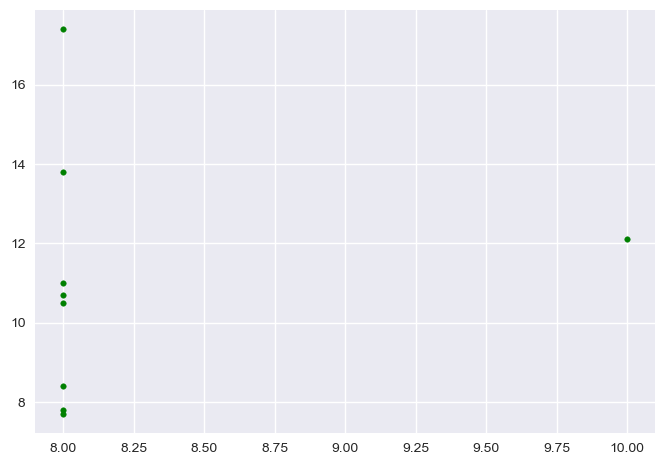

In [32]:
plt.scatter(Large_property_df['Rooms'],Large_property_df['Distance'], color='g', s=16)

# Merging Dataframes

I merged relevant_columns_df and property_type_df2 using the inner join method to create a new DataFrame called Merged_df.

In [33]:
Merged_df = relevant_columns_df.merge(property_type_df2, how='inner')
Merged_df

,Suburb,Rooms,Type,Price,Date,Distance,Bedroom2,Bathroom,Car,Landsize,Lattitude,Longtitude
0,Abbotsford,2,House,1480000,03/12/2016,2.5,2,1,1.0,202,-37.79960,144.99840
1,Abbotsford,2,House,1035000,04/02/2016,2.5,2,1,0.0,156,-37.80790,144.99340
2,Abbotsford,3,House,1465000,04/03/2017,2.5,3,2,0.0,134,-37.80930,144.99440
3,Abbotsford,3,House,850000,04/03/2017,2.5,3,2,1.0,94,-37.79690,144.99690
4,Abbotsford,4,House,1600000,04/06/2016,2.5,3,1,2.0,120,-37.80720,144.99410
...,...,...,...,...,...,...,...,...,...,...,...,...
10560,Wheelers Hill,4,House,1245000,26/08/2017,16.7,4,2,2.0,652,-37.90562,145.16761
10561,Williamstown,3,House,1031000,26/08/2017,6.8,3,2,2.0,333,-37.85927,144.87904
10562,Williamstown,3,House,1170000,26/08/2017,6.8,3,2,4.0,436,-37.85274,144.88738
10563,Williamstown,4,House,2500000,26/08/2017,6.8,4,1,5.0,866,-37.85908,144.89299


Use of NumPy Functions

In [34]:
numpy_price = np_price.to_numpy()
print(numpy_price)

[[1480000]
 [1035000]
 [1465000]
 ...
 [1170000]
 [2500000]
 [1285000]]


In [35]:
numpy_rooms = np_rooms.to_numpy()
print(numpy_rooms)

[[2]
 [2]
 [3]
 ...
 [3]
 [4]
 [4]]


In [36]:
average_price_per_room = numpy_price / numpy_rooms
print(average_price_per_room)

[[740000.        ]
 [517500.        ]
 [488333.33333333]
 ...
 [390000.        ]
 [625000.        ]
 [321250.        ]]


In [64]:
average_price_per_room > 2000000

array([[False],
       [False],
       [False],
       ...,
       [False],
       [False],
       [False]])

# Analysis

.describe function was used to get the numercial statistics for the numercial columns.

In [37]:
Merged_df.describe()

,Rooms,Price,Distance,Bedroom2,Bathroom,Car,Landsize,Lattitude,Longtitude
count,10565.000000,1.056500e+04,10565.000000,10565.000000,10565.000000,10565.000000,10565.000000,10565.000000,10565.000000
mean,3.216186,1.209991e+06,10.859924,3.185518,1.634548,1.747620,581.570847,-37.805047,144.994882
std,0.844175,6.516656e+05,6.016775,0.869700,0.722075,1.013781,4428.905784,0.083416,0.111902
min,1.000000,1.310000e+05,1.200000,0.000000,0.000000,0.000000,0.000000,-38.182550,144.431810
25%,3.000000,7.730000e+05,6.900000,3.000000,1.000000,1.000000,275.000000,-37.854700,144.920800
50%,3.000000,1.040000e+06,10.300000,3.000000,2.000000,2.000000,533.000000,-37.794300,145.002000
75%,4.000000,1.455000e+06,13.700000,4.000000,2.000000,2.000000,664.000000,-37.749100,145.066800
max,10.000000,9.000000e+06,48.100000,20.000000,8.000000,10.000000,433014.000000,-37.408530,145.526350


Use of GroupBy function in conjuction with agg. and plot in order to display the mean prices of the property types of Merged_df.

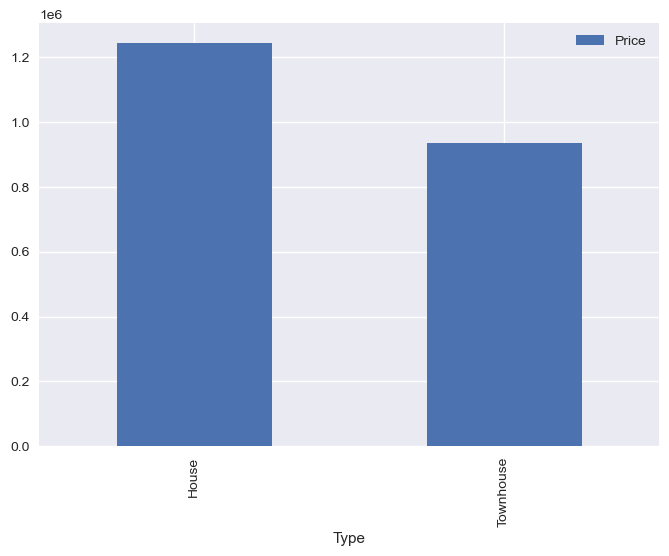

In [38]:
Merged_df.groupby('Type').agg('mean').plot(kind='bar', y='Price')
plt.show()

Use of GroupBy function in conjuction with agg. and plot in order to display the minimum prices of the property types of Merged_df.

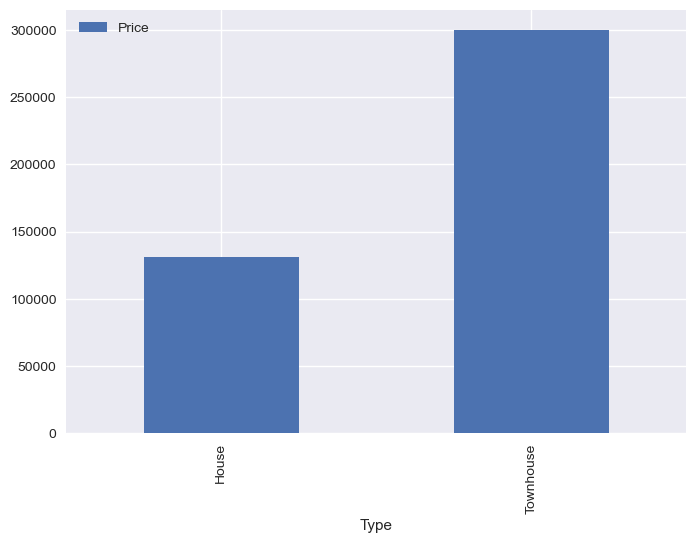

In [39]:
Merged_df.groupby('Type').agg('min').plot(kind='bar', y='Price')
plt.show()

To gain an understanding of the mean value across all numercial columns for property type I used the GroupBy function on Type column of Merged_df.

In [40]:
Property_average = Merged_df.groupby(['Type']).mean()
Property_average

,Rooms,Price,Distance,Bedroom2,Bathroom,Car,Landsize,Lattitude,Longtitude
Type,,,,,,,,,
House,3.260874,1.242665e+06,10.979479,3.229336,1.613822,1.770198,617.181924,-37.803795,144.994700
Townhouse,2.837814,9.333520e+05,9.847670,2.814516,1.810036,1.556452,280.057348,-37.815650,144.996419


To gain an understanding of the mean value across all numercial columns for each Region I used the GroupBy function on Type column of Merged_df.

In [41]:
Region_average = melbourne_property_df.groupby(['Regionname']).mean()
Region_average

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,Lattitude,Longtitude,Propertycount
Regionname,,,,,,,,,,,
Eastern Metropolitan,3.322230,1.104080e+06,13.901088,3111.162475,3.313392,1.698844,1.792543,634.133923,-37.788820,145.129184,5713.788579
Eastern Victoria,3.396226,6.999808e+05,34.209434,3567.584906,3.396226,1.811321,2.056604,2949.698113,-37.959292,145.324428,8872.358491
Northern Metropolitan,2.755527,8.981711e+05,8.078329,3071.360925,2.734190,1.367866,1.454964,568.948072,-37.747258,144.981176,9485.602057
Northern Victoria,3.560976,5.948293e+05,33.748780,3418.707317,3.560976,1.853659,1.917319,3355.463415,-37.599620,144.838486,4260.975610
South-Eastern Metropolitan,3.360000,9.229438e+05,23.813556,3225.255556,3.355556,1.657778,2.044444,613.991111,-37.993727,145.145865,6589.366667
Southern Metropolitan,2.860916,1.372963e+06,8.756656,3156.714590,2.835144,1.624068,1.576458,509.252183,-37.866981,145.034312,7622.279233
Western Metropolitan,3.023406,8.664205e+05,10.104579,3031.781208,2.990502,1.501018,1.696099,493.606852,-37.782382,144.862512,5561.785957
Western Victoria,3.406250,3.975234e+05,30.753125,3337.687500,3.406250,1.468750,1.843750,655.500000,-37.695163,144.569906,4191.156250


Car column of unit_df in descending order.

In [60]:
unit_df.sort_values(by=['Car'], ascending=False)

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,Lattitude,Longtitude,Propertycount
Regionname,,,,,,,,,,,,,,,,,
Western Metropolitan,Albion,2/32 Forrest St,3,Unit,560000,S,Douglas,25/02/2017,13.9,3020,3,2,7.0,420,-37.78480,144.8231,2185
Western Metropolitan,Werribee,13b Kingfisher Ct,3,Unit,394000,PI,hockingstuart,29/07/2017,14.7,3030,3,2,4.0,287,-37.87895,144.6707,16166
Northern Metropolitan,Coburg,35 The Grove,8,Unit,2250000,PI,Peter,04/03/2017,7.8,3058,4,2,4.0,983,-37.75170,144.9699,11204
Southern Metropolitan,Camberwell,19A Warburton Rd,4,Unit,1900000,VB,HAR,17/06/2017,7.7,3124,4,2,4.0,336,-37.82600,145.0707,8920
Southern Metropolitan,Brighton East,4/25 Cluden St,2,Unit,910000,S,Woodards,13/05/2017,10.7,3187,2,1,3.0,238,-37.91260,145.0105,6938
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Southern Metropolitan,South Yarra,2/28 Tivoli Pl,2,Unit,910000,S,Williams,28/08/2016,3.3,3141,2,0,0.0,0,-37.83570,144.9859,14887
Southern Metropolitan,Ripponlea,4/16 Hotham Gr,2,Unit,660000,S,RT,12/11/2016,7.4,3185,2,1,0.0,477,-37.88040,144.9969,821
Northern Metropolitan,Melbourne,208/108 Flinders St,1,Unit,375000,PI,LITTLE,15/10/2016,2.8,3000,1,1,0.0,1414,-37.81610,144.9712,17496


Land size column of Region_average in descending order.

In [57]:
Region_average.sort_values(by=['Landsize'], ascending=False)

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,Lattitude,Longtitude,Propertycount
Regionname,,,,,,,,,,,
Northern Victoria,3.560976,5.948293e+05,33.748780,3418.707317,3.560976,1.853659,1.917319,3355.463415,-37.599620,144.838486,4260.975610
Eastern Victoria,3.396226,6.999808e+05,34.209434,3567.584906,3.396226,1.811321,2.056604,2949.698113,-37.959292,145.324428,8872.358491
Western Victoria,3.406250,3.975234e+05,30.753125,3337.687500,3.406250,1.468750,1.843750,655.500000,-37.695163,144.569906,4191.156250
Eastern Metropolitan,3.322230,1.104080e+06,13.901088,3111.162475,3.313392,1.698844,1.792543,634.133923,-37.788820,145.129184,5713.788579
South-Eastern Metropolitan,3.360000,9.229438e+05,23.813556,3225.255556,3.355556,1.657778,2.044444,613.991111,-37.993727,145.145865,6589.366667
Northern Metropolitan,2.755527,8.981711e+05,8.078329,3071.360925,2.734190,1.367866,1.454964,568.948072,-37.747258,144.981176,9485.602057
Southern Metropolitan,2.860916,1.372963e+06,8.756656,3156.714590,2.835144,1.624068,1.576458,509.252183,-37.866981,145.034312,7622.279233
Western Metropolitan,3.023406,8.664205e+05,10.104579,3031.781208,2.990502,1.501018,1.696099,493.606852,-37.782382,144.862512,5561.785957


I used a dictionary to create a spefic DataFrame and called it Largest_landsize_df.

In [43]:
Largest_landsize_df = pd.DataFrame({'Regionname': ['Northern Victoria', 'Eastern Victoria', 'Western Victoria', 'Eastern Metropolitan'],
                                   'Price': [5.948293e+05, 6.999808e+05, 3.975234e+05, 1.104080e+06],
                                   'Landsize': [3355.463415, 2949.698113, 655.500000, 634.133923]})
Largest_landsize_df

,Regionname,Price,Landsize
0,Northern Victoria,594829.3,3355.463415
1,Eastern Victoria,699980.8,2949.698113
2,Western Victoria,397523.4,655.500000
3,Eastern Metropolitan,1104080.0,634.133923


Conditional Statement using For

In [63]:
for Column in Largest_landsize_df :
    print(Column)

Regionname
Price
Landsize


Bar chart with information obtained from Largest_landsize_df to display the region with the largest land size.

<AxesSubplot:xlabel='Regionname'>

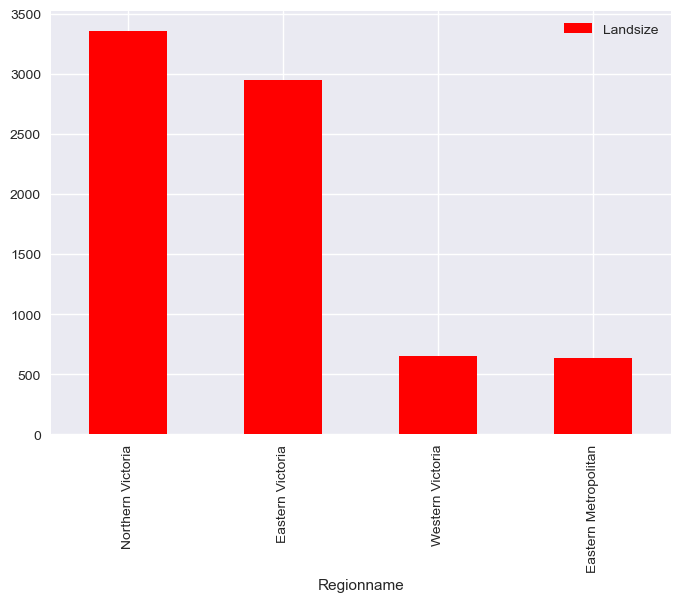

In [44]:
Largest_landsize_df.plot(kind='bar', y='Landsize', x='Regionname', color='r')

Use of GroupBy function in conjuction with agg. and plot in order to display the minimum prices of each region from melbourne_property_df.

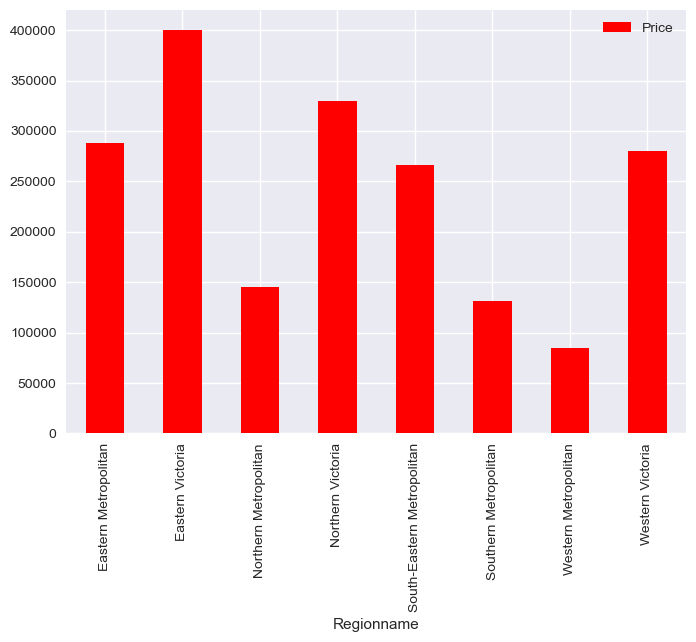

In [45]:
melbourne_property_df.groupby('Regionname').agg('min').plot(kind='bar', y='Price', color='r')
plt.show()

Looping - Used the iterrows() function on Rowville_overview_df to identify property type.

In [55]:
for index, row in Rowville_overview_df.iterrows():
  print(row["Type"])

House
House
House
House
House
House
House
House
House
House


 Used the iterrows() function on unit_df to identify suburbs with Unit property types.

In [56]:
for index, row in unit_df.iterrows():
  print(row["Suburb"])

Abbotsford
Abbotsford
Abbotsford
Abbotsford
Abbotsford
Abbotsford
Abbotsford
Abbotsford
Abbotsford
Airport West
Airport West
Airport West
Airport West
Airport West
Airport West
Airport West
Albert Park
Albert Park
Alphington
Alphington
Alphington
Alphington
Alphington
Altona
Altona
Altona
Altona
Altona
Altona
Altona
Altona
Altona
Altona
Altona
Altona
Altona
Altona
Altona
Altona
Altona North
Armadale
Armadale
Armadale
Armadale
Armadale
Armadale
Armadale
Armadale
Armadale
Armadale
Armadale
Armadale
Armadale
Armadale
Armadale
Armadale
Armadale
Armadale
Armadale
Armadale
Armadale
Armadale
Armadale
Armadale
Armadale
Armadale
Armadale
Armadale
Armadale
Armadale
Armadale
Armadale
Ascot Vale
Ascot Vale
Ascot Vale
Ascot Vale
Ascot Vale
Ascot Vale
Ascot Vale
Ascot Vale
Ascot Vale
Ascot Vale
Ascot Vale
Ascot Vale
Ascot Vale
Ascot Vale
Ascot Vale
Ascot Vale
Ascot Vale
Ashburton
Ashwood
Ashwood
Ashwood
Ashwood
Ashwood
Avondale Heights
Avondale Heights
Avondale Heights
Avondale Heights
Balaclava
Bal